In [3]:
import nbconvert, pandas, ipywidgets, matplotlib, IPython

In [7]:
%mkdir _layouts
with open('app.py','w') as f:
    f.write(nbconvert.export_python('app.ipynb')[0])
import app
with open('views.py','w') as f:
    f.write(nbconvert.export_python('views.ipynb')[0])
import views

mkdir: _layouts: File exists
Writing _layouts/d3_helper.coffee
Writing _layouts/table.html
Writing _layouts/update_table_index.coffee
Writing _layouts/update_table.coffee


In [8]:
projects = app.Projects()
projects.access_token.value = '33aacf7b0b2c5c18c52b4299dad0c22272499599'
[projects.add_project(p) for p in ['jupyter/notebook','blaze/blaze']]
view = views.Views(pandas.DataFrame())

In [9]:
def repo_button_panel( project ):
    urls = ipywidgets.Textarea("""""")
    rows = []
    row = []
    def on_click_button( button ):
        projects.more( button.url.split('{')[0] )
        urls.value = '\n'.join(projects.catalog.keys())

    for key, value in projects.catalog[project]['response'].json().items():
        if key.endswith('_url'):
            button = ipywidgets.Button( description = key )
            button.url = value
            button.on_click( on_click_button )
            row.append(button)
            if len(row) == 6:
                rows.append(row)
                row = []
    if len(row) > 0:
        rows.append(row)
        
    return view.display(urls, view.layout(rows),IPython.display.Markdown('### Get more information on the `'+project+'`'))


In [10]:
repo_button_panel(projects.current[0])

### Get more information on the `jupyter/notebook`

In [11]:
repo_button_panel(projects.current[1])

### Get more information on the `blaze/blaze`

/Users/tfast/anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


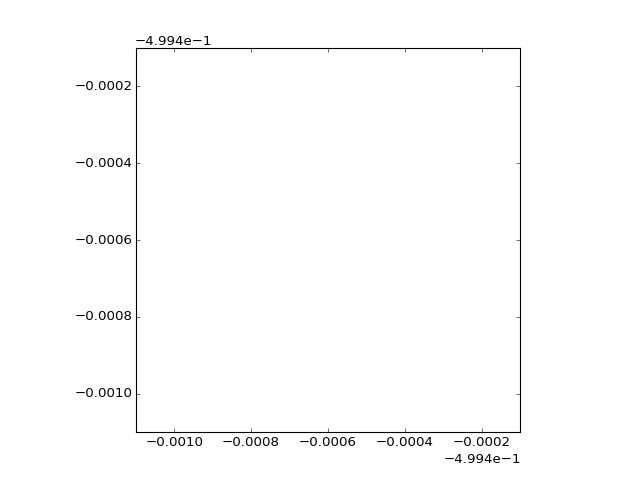

/Users/tfast/anaconda/lib/python3.4/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))
/Users/tfast/anaconda/lib/python3.4/site-packages/matplotlib/axes/_base.py:2809: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


In [12]:
%matplotlib notebook
matplotlib.pyplot.imshow(projects.df.isnull().values)

In [14]:
table = views.Views( projects.df )
table.process(table.template['d3_helper.coffee'].name)

<IPython.core.display.Javascript object>

In [15]:
table.columns

In [16]:
table.table()

<IPython.core.display.Javascript object>

None